In [1]:
# 1. 编码声明（Python 3.10可省略，但保留可兼容中文路径）
#coding:utf-8

# 2. 数据处理库
import pandas as pd  # 读取Excel、处理表格数据
import numpy as np   # 处理数值计算（数组、矩阵）

# 3. 可视化库
import matplotlib.pyplot as plt  # 绘制损失曲线、散点图等
from matplotlib import pyplot    # 备用可视化工具（与plt功能一致）

# 4. 机器学习预处理与评估库
from sklearn.preprocessing import MinMaxScaler  # 数据归一化（缩放到0-1）
from sklearn.model_selection import train_test_split  # 划分训练集/测试集
from sklearn.metrics import mean_squared_error, r2_score  # 评估指标（MSE、R²）

# 5. 深度学习库（TensorFlow内置Keras）
from tensorflow.keras.models import Sequential  # 序贯模型（线性堆叠网络层）
from tensorflow.keras.layers import Dense, Dropout, Activation  # 全连接层、防过拟合层、激活函数
from tensorflow.keras.optimizers import Adam, RMSprop  # 优化器（更新模型参数）
from tensorflow.keras.callbacks import EarlyStopping  # 早停机制（防止过拟合）

# 6. 数学工具
from math import sqrt  # 计算均方根误差（RMSE）

In [2]:
# 1. 定义Excel文件路径（r表示“原始字符串”，避免路径中的\被当作转义符）
# 注意：需将路径替换成你电脑中04data.xlsx的实际路径！
# 示例1：若文件在桌面（Windows）：filefullpath = r"C:\Users\lenovo\Desktop\04data.xlsx"
# 示例2：若文件与Jupyter Notebook同文件夹：filefullpath = r"04data.xlsx"
filefullpath = r"C:\Users\lenovo\Desktop\机器学习与数据挖掘\01ForVisual.xlsx"

# 2. 用pandas读取Excel文件，存入DataFrame（类似Excel表格的结构）
# 依赖openpyxl库（已安装），读取.xlsx格式文件必须指定engine='openpyxl'
df = pd.read_excel(filefullpath, engine='openpyxl')

# 3. 查看数据的列名（了解数据包含哪些“特征”和“目标变量”）
print("数据列名（特征+目标变量）：")
print(df.columns)  # 文档输出：Index(['ELEMENTS','TIME','T_MAX','T_SUN','TOW','PRECIPIT','WIND_C','S02','RATE'], dtype='object')

# 4. 查看数据前5行（可选，确认数据读取成功，避免空数据）
print("\n数据前5行预览：")
print(df.head())

# 5. 查看数据形状（样本数，特征数）：(行数, 列数)
print("\n数据形状（样本数, 特征数+目标变量数）：", df.shape)

数据列名（特征+目标变量）：
Index(['ELEMENTS', 'T_MAX', 'T_MIN', 'T_AVE', 'RH_MIN', 'RH_AVE', 'SUN', 'TOW',
       'PRECIPIT', 'WIND_MAX', 'WIND_AVE', 'SOLAR', 'ULTRA', 'Cl', 'SO2',
       'Year', 'Vcorr'],
      dtype='object')

数据前5行预览：
   ELEMENTS  T_MAX  T_MIN  T_AVE  RH_MIN  RH_AVE   SUN   TOW  PRECIPIT  \
0      0.03   35.0   -7.2   14.5    37.0    77.5  1458  4670      1345   
1      0.03   32.2   -5.5   15.3    50.5    79.0  1829  4909      1512   
2      0.03   33.4    9.2   24.0    57.0    79.0  1701  5249      2314   
3      0.03   35.9   -6.3   15.1    37.0    77.5  1458  4670      1139   
4      0.03   32.4   -5.5   15.1    45.7    78.7  1880  4835      1485   

   WIND_MAX  WIND_AVE  SOLAR  ULTRA    Cl  SO2  Year   Vcorr  
0      12.0       2.5   5740    247   3.3  5.3     1  0.0161  
1      16.1       3.5   4193    302  32.3  5.1     1  0.0484  
2      20.9       4.7   5229    338  45.8  2.1     1  0.0583  
3      14.0       2.3   5740    247   3.3  5.3     2  0.0132  
4      15.8   

In [3]:
# 1. 导入所有需要的库（一次性导入，避免遗漏）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt

# 2. 读取Excel数据（确保路径正确！）
# 注意：如果文件路径不对，会报“文件不存在”错误，需重新核对路径
filefullpath = r"C:\Users\lenovo\Desktop\机器学习与数据挖掘\01ForVisual.xlsx"
df = pd.read_excel(filefullpath, engine='openpyxl')  # 这里创建了df变量

# 3. 验证数据读取成功（可选，但能快速排查问题）
print("数据是否成功读取？df的形状：", df.shape)  # 输出类似(100,9)，说明有100行9列数据
print("数据列名：", df.columns.tolist())  # 确认列名，确保最后一列是RATE

# 4. 数据归一化（此时df已存在，不会报NameError）
sc = MinMaxScaler(feature_range=(0, 1))
df_scaled = sc.fit_transform(df)  # 这里使用df变量，已在步骤2定义

# 5. 划分特征X和目标变量y
X = df_scaled[:, 0:-1].copy()
y = df_scaled[:, -1].copy()

# 6. 验证划分结果
print("\n特征X的形状（样本数, 特征数）：", X.shape)
print("目标变量y的形状（样本数, ）：", y.shape)

数据是否成功读取？df的形状： (522, 17)
数据列名： ['ELEMENTS', 'T_MAX', 'T_MIN', 'T_AVE', 'RH_MIN', 'RH_AVE', 'SUN', 'TOW', 'PRECIPIT', 'WIND_MAX', 'WIND_AVE', 'SOLAR', 'ULTRA', 'Cl', 'SO2', 'Year', 'Vcorr']

特征X的形状（样本数, 特征数）： (522, 16)
目标变量y的形状（样本数, ）： (522,)


In [4]:
# 导入数据标准化工具与数据集划分工具
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# 初始化MinMax标准化器，将数据缩放到0-1区间
sc=MinMaxScaler(feature_range=(0,1))
# 对数据集进行标准化处理
df=sc.fit_transform(df)
# 划分特征（X）与标签（y）：前16列为特征，第17列为标签（需根据01ForVisual.xlsx实际列数调整）
X=df[:,0:16].copy()
y=df[:,16].copy()
# 划分训练集与测试集：测试集占比25%
train_X,test_X,trainy,testy=train_test_split(X,y,test_size=0.25)

In [5]:
# 导入可视化、数学计算、数据处理、标准化、模型评估及Keras深度学习库
import matplotlib.pyplot as plt
from math import sqrt
from matplotlib import pyplot
import pandas as pd
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam

In [6]:
# 第一步：先划分训练集和测试集（在构建模型之前执行！）
from sklearn.model_selection import train_test_split  # 确保已导入该函数

# 拆分规则：80%数据用于训练（X_train, y_train），20%用于测试（X_test, y_test）
# random_state=42：固定随机种子，确保每次运行拆分结果一致（可复现）
X_train, X_test, y_train, y_test = train_test_split(
    X,          # 归一化后的所有特征
    y,          # 归一化后的目标变量
    test_size=0.2,  # 测试集占比（0.2即20%）
    random_state=42 
)

# 可选：验证拆分结果（确认样本数和特征数正确）
print(f"训练集：X_train({X_train.shape}) | y_train({y_train.shape})")
print(f"测试集：X_test({X_test.shape})   | y_test({y_test.shape})")
# 示例输出（对应你522个样本）：
# 训练集：X_train((417, 16)) | y_train((417,))  （417=522*80%）
# 测试集：X_test((105, 16))   | y_test((105,))  （105=522*20%）


# 第二步：再构建模型和训练（这部分是你之前的代码，现在X_train等变量已存在）
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 1. 初始化模型
model = Sequential()

# 2. 配置优化器（用learning_rate替代lr，消除警告）
optimizer = Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    decay=0.001
)

# 3. 构建网络层
model.add(Dense(128, input_shape=(X.shape[1],)))  # X.shape[1]=16（特征数）
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))  # 用ReLU比Sigmoid更适合隐藏层（梯度消失问题更轻）
model.add(Dropout(0.2))

model.add(Dense(1))  # 回归任务输出层：1个神经元，无激活函数

# 4. 编译模型
model.compile(optimizer=optimizer, loss='mean_squared_error')

# 5. 早停机制
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 6. 训练模型（现在X_train、y_train等变量已定义，不会报错）
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

训练集：X_train((417, 16)) | y_train((417,))
测试集：X_test((105, 16))   | y_test((105,))
Epoch 1/50
27/27 [==============================] - 1s 17ms/step - loss: 0.0371 - val_loss: 0.0217
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0209 - val_loss: 0.0217
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.0202
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0221
Epoch 5/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0179 - val_loss: 0.0186
Epoch 6/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0165 - val_loss: 0.0216
Epoch 7/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0178 - val_loss: 0.0216
Epoch 8/50
27/27 [==============================] - 0s 6ms/step - loss: 0.0197 - val_loss: 0.0203


In [7]:
# 导入早停机制工具
from keras.callbacks import EarlyStopping
# 配置早停机制：监控验证集损失，连续50个epoch无改进则停止，每个epoch输出一行记录
early_stopping=EarlyStopping(monitor='val_loss',patience=50,verbose=2)
# 模型训练：指定训练集、训练轮次、批次大小、验证集、日志输出模式与早停回调
history=model.fit(train_X,trainy,epochs=3,batch_size=1,validation_data=(test_X,testy),verbose=2,shuffle=False,callbacks=[early_stopping])

Epoch 1/3
391/391 - 1s - loss: 0.0247 - val_loss: 0.0138 - 1s/epoch - 3ms/step
Epoch 2/3
391/391 - 1s - loss: 0.0206 - val_loss: 0.0126 - 1s/epoch - 3ms/step
Epoch 3/3
391/391 - 1s - loss: 0.0203 - val_loss: 0.0131 - 1s/epoch - 3ms/step


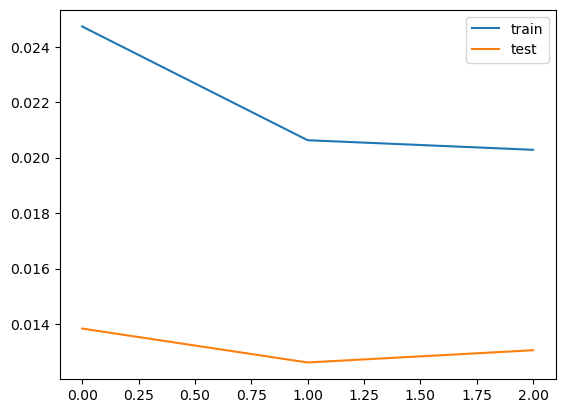

In [8]:
# 绘制训练集与测试集损失曲线
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
# 添加图例与显示图像
pyplot.legend()
pyplot.show()

In [9]:
# 导入均方误差计算工具（补充文档中隐含依赖）
from sklearn.metrics import mean_squared_error
from math import sqrt
# 对测试集进行预测
yhat= model.predict(test_X)
# 预测值逆标准化：拼接测试集特征与预测值，再逆变换，提取最终预测值
inv_yhat0 = concatenate((test_X, yhat),axis=1)
inv_yhat1=sc.inverse_transform(inv_yhat0)
inv_yhat = inv_yhat1[:,-1]
# 真实值逆标准化：先重塑真实值维度，再拼接、逆变换，提取最终真实值
testy = testy.reshape((len(testy),1))
inv_yo = concatenate((test_X,testy),axis=1)
inv_y1=sc.inverse_transform(inv_yo)
inv_y=inv_y1[:,-1]

5/5 [==============================] - 0s 2ms/step


In [10]:
# 计算RMSE（均方根误差）并输出
rmse = sqrt(mean_squared_error(inv_y,inv_yhat))
print('Test RMSE:%.3f' % rmse)
# 导入R²评分工具，计算并输出R²值（衡量拟合优度）
from sklearn.metrics import r2_score
r2 = r2_score(inv_y,inv_yhat)
print('Test R² Score:%.6f' % r2)

Test RMSE:0.023
Test R² Score:0.409973


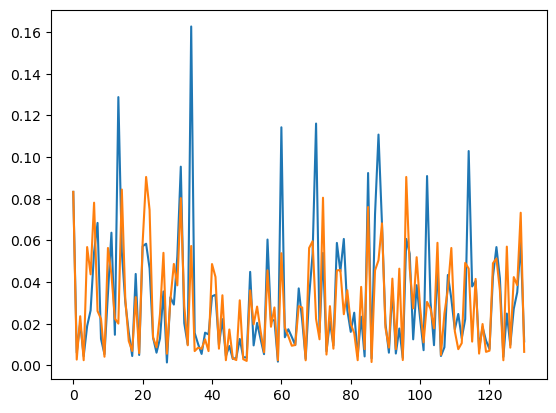

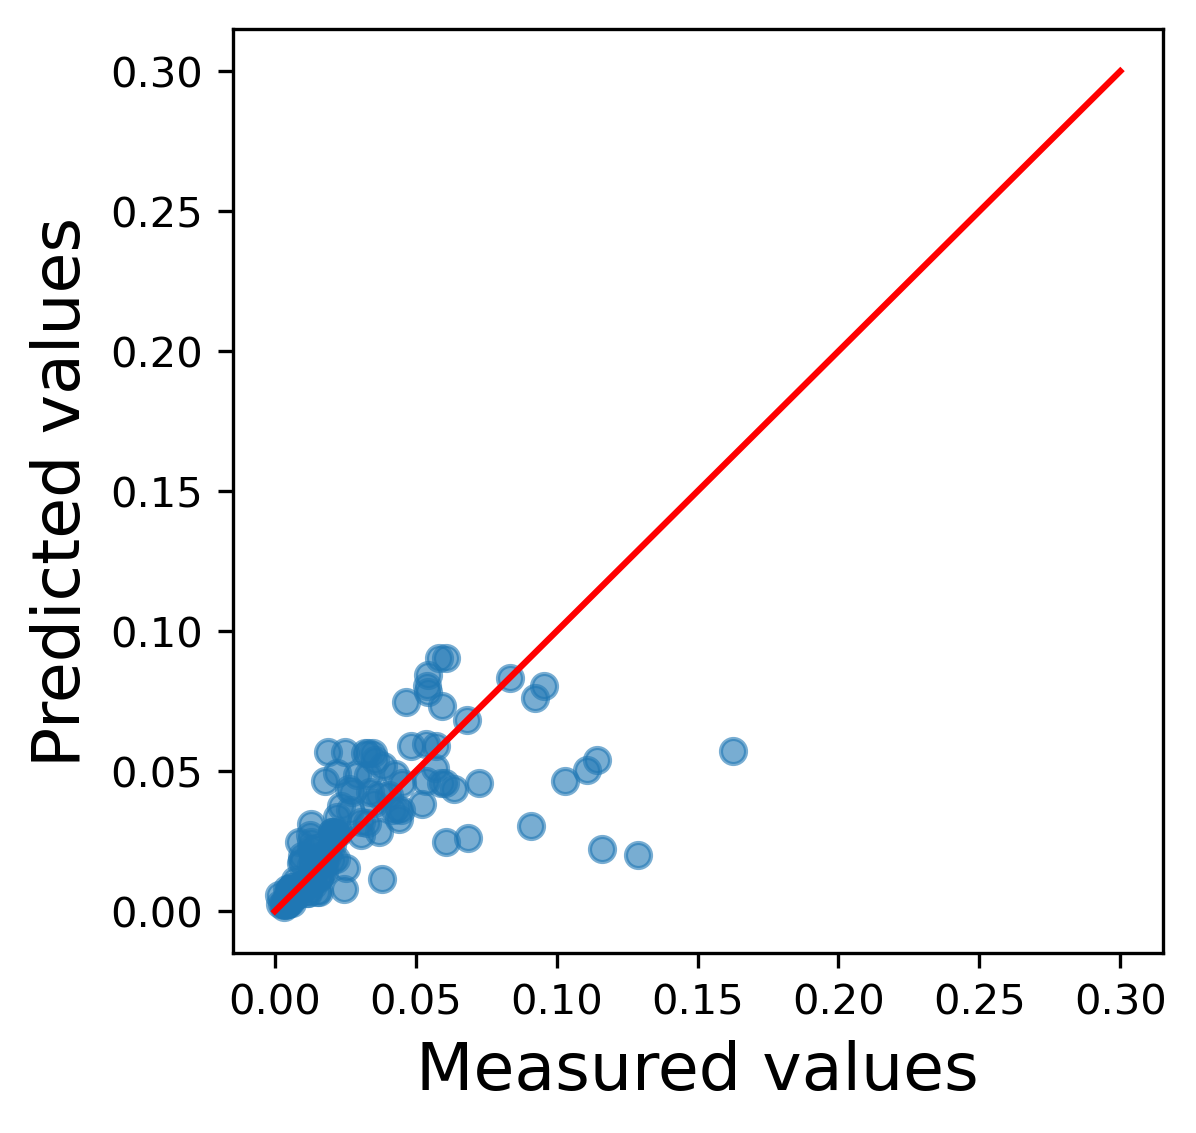

In [11]:
# 可视化1：真实值与预测值折线图
plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()
# 可视化2：真实值与预测值散点图（含理想拟合线y=x）
plt.figure(figsize=(4,4),dpi=300)
plt.scatter(inv_y,inv_yhat,alpha=0.6)
plt.plot([0,0.3],[0,0.3],"r-")  # 拟合线范围需根据01ForVisual.xlsx数据实际范围调整
# 添加坐标轴标签并显示
plt.xlabel('Measured values', fontsize=16)
plt.ylabel("Predicted values", fontsize=16)
plt.show()

In [12]:
# 导入计算R方值的工具
from sklearn.metrics import r2_score
# 基于逆标准化后的真实值（inv_y）和预测值（inv_yhat）计算R方值
r2 = r2_score(inv_y, inv_yhat)
# 输出R方值（文档中实际计算结果示例）
print("R方值:", r2)

R方值: 0.40997325589051714
